In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk textblob

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk import RegexpParser
from nltk.tree import Tree
from nltk import pos_tag
import re
from contextlib import redirect_stdout
import io
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import string
from collections import Counter
import statistics

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
file_path = r'acled_india_csv.csv'
acled_df = pd.read_csv(file_path, delimiter = ';')
acled_df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,7118851,356,IND74745,74745,30 May 2020,2020,1,Riots,Violent demonstration,Rioters (India),...,Uluberia,22.475599,88.098900,1,The Hindu,National,"On 30 May 2020, two groups of people clashed w...",0,1591137952,IND
1,7118861,356,IND74746,74746,30 May 2020,2020,1,Protests,Peaceful protest,Protesters (India),...,Jamuria,23.704599,87.078697,1,The Hindu,National,"On 30 May 2020, local residents staged protest...",0,1591137952,IND
2,7118864,356,IND74748,74748,30 May 2020,2020,1,Protests,Peaceful protest,Protesters (India),...,Suri,23.908001,87.527702,1,The Hindu,National,"On 30 May 2020, the local residents staged pro...",0,1591137952,IND
3,7118903,356,IND74739,74739,30 May 2020,2020,1,Riots,Mob violence,Rioters (India),...,Halisahar,22.944000,88.418999,1,Times of India,National,"On 30 May 2020, members of Trinamool Congress ...",0,1591137952,IND
4,7118904,356,IND74740,74740,30 May 2020,2020,1,Riots,Violent demonstration,Rioters (India),...,Baranagar,22.646700,88.373596,1,Times of India,National,"On 30 May 2020, local residents staged a demon...",0,1591137952,IND


In [6]:
print(acled_df.dtypes)

data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty      int64
event_date           object
year                  int64
time_precision        int64
event_type           object
sub_event_type       object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3               object
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object


In [8]:
def nlp_prep(data):
    data = data.copy()
    
    # Convert "notes" column to lowercase
    data['notes'] = data['notes'].str.lower()
    
    # Remove duplicate values
    data = data.drop_duplicates().reset_index(drop = True)
    
    # Initialize lemmatizer and stopwords
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    
    # Initialize a list to store the processed "notes"
    cleaned_notes = []
    
    for i in range(len(data)):
        note = data['notes'].iloc[i]
        
        # Remove non-alphanumeric characters
        note = re.sub(r'[^0-9A-Za-z]', ' ', note)

        # Remove punctuation
        note = ''.join([char for char in note if char not in string.punctuation])
        
        # Tokenize
        words = note.split()
        
        # Perform POS tagging
        tagged_words = pos_tag(words)
        
        # Lemmatize and remove stopwords
        cleaned_words = [lem.lemmatize(word) for word, pos in tagged_words if word not in stop]
        
        # Join the cleaned words
        cleaned_note = ' '.join(cleaned_words)
        
        cleaned_notes.append(cleaned_note)
    
    # Replace the "notes" column with the cleaned and lemmatized text
    data['cleaned_notes'] = cleaned_notes
    
    return data

# Apply the nlp_prep function to acled_df
acled_df = nlp_prep(acled_df)

# Print the updated DataFrame with "cleaned_notes" column
print(acled_df.head())

   data_id  iso event_id_cnty  event_id_no_cnty   event_date  year  \
0  7118851  356      IND74745             74745  30 May 2020  2020   
1  7118861  356      IND74746             74746  30 May 2020  2020   
2  7118864  356      IND74748             74748  30 May 2020  2020   
3  7118903  356      IND74739             74739  30 May 2020  2020   
4  7118904  356      IND74740             74740  30 May 2020  2020   

   time_precision event_type         sub_event_type              actor1  ...  \
0               1      Riots  Violent demonstration     Rioters (India)  ...   
1               1   Protests       Peaceful protest  Protesters (India)  ...   
2               1   Protests       Peaceful protest  Protesters (India)  ...   
3               1      Riots           Mob violence     Rioters (India)  ...   
4               1      Riots  Violent demonstration     Rioters (India)  ...   

    latitude  longitude geo_precision          source  source_scale  \
0  22.475599  88.098900    

In [16]:
# Calculate and add a lengths column for cleaned notes
acled_df['length'] = acled_df['cleaned_notes'].apply(len)

# Print the updated DataFrame with the "length" column
print(acled_df.head())

   data_id  iso event_id_cnty  event_id_no_cnty   event_date  year  \
0  7118851  356      IND74745             74745  30 May 2020  2020   
1  7118861  356      IND74746             74746  30 May 2020  2020   
2  7118864  356      IND74748             74748  30 May 2020  2020   
3  7118903  356      IND74739             74739  30 May 2020  2020   
4  7118904  356      IND74740             74740  30 May 2020  2020   

   time_precision event_type         sub_event_type              actor1  ...  \
0               1      Riots  Violent demonstration     Rioters (India)  ...   
1               1   Protests       Peaceful protest  Protesters (India)  ...   
2               1   Protests       Peaceful protest  Protesters (India)  ...   
3               1      Riots           Mob violence     Rioters (India)  ...   
4               1      Riots  Violent demonstration     Rioters (India)  ...   

   longitude  geo_precision          source source_scale  \
0  88.098900              1       The 

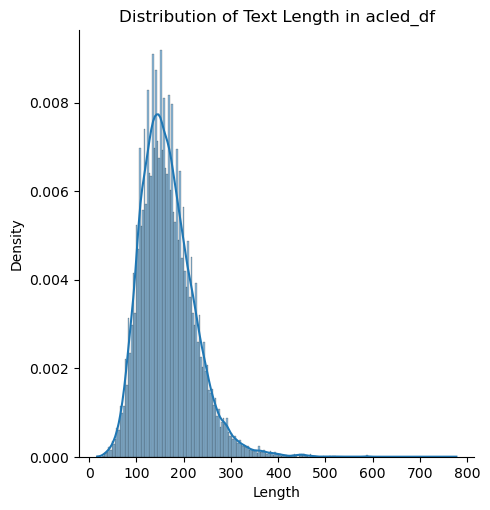

In [17]:
# Create a distribution plot for the "length" column in acled_df
sns.displot(acled_df['length'], kde = True, stat='density')

plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Distribution of Text Length in acled_df')

plt.show()

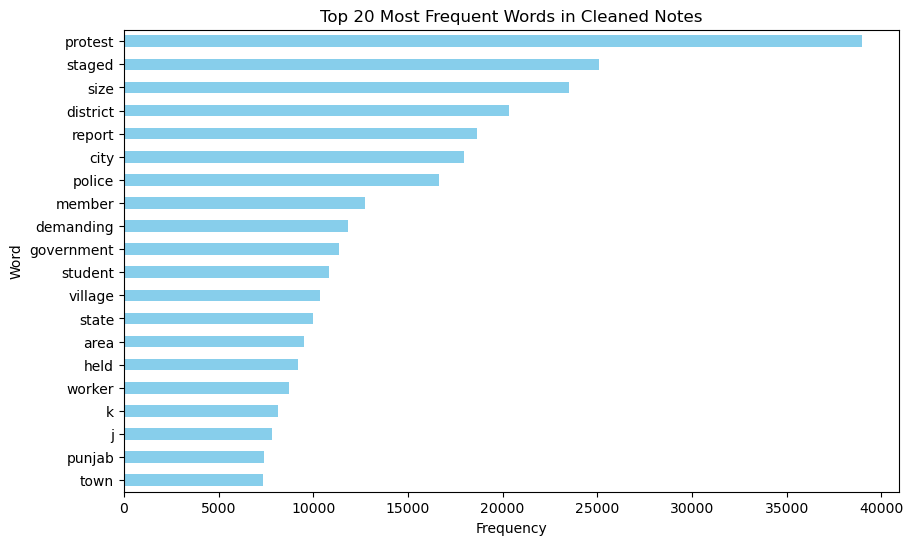

In [18]:
# Tokenize the cleaned notes and count word frequencies
tokenized_notes = ' '.join(acled_df['cleaned_notes']).split()
word_freq = pd.Series(tokenized_notes).value_counts()

top_n = 20
top_words = word_freq.head(top_n)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top {} Most Frequent Words in Cleaned Notes'.format(top_n))
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

'k' and 'j' are both among top 20 frequent words, which is likely an oversight in the NLP preparation.

   data_id  iso event_id_cnty  event_id_no_cnty   event_date  year  \
0  7118851  356      IND74745             74745  30 May 2020  2020   
1  7118861  356      IND74746             74746  30 May 2020  2020   
2  7118864  356      IND74748             74748  30 May 2020  2020   
3  7118903  356      IND74739             74739  30 May 2020  2020   
4  7118904  356      IND74740             74740  30 May 2020  2020   

   time_precision event_type         sub_event_type              actor1  ...  \
0               1      Riots  Violent demonstration     Rioters (India)  ...   
1               1   Protests       Peaceful protest  Protesters (India)  ...   
2               1   Protests       Peaceful protest  Protesters (India)  ...   
3               1      Riots           Mob violence     Rioters (India)  ...   
4               1      Riots  Violent demonstration     Rioters (India)  ...   

           source  source_scale  \
0       The Hindu      National   
1       The Hindu      Natio

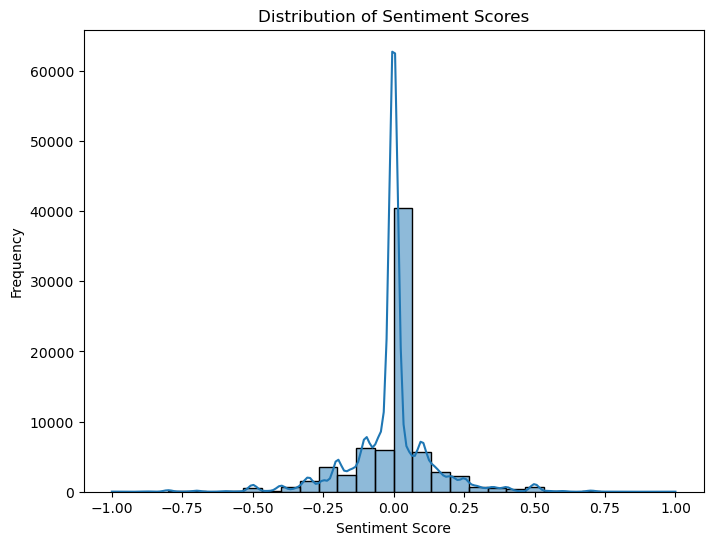

In [28]:
# Create a function to get sentiment scores for each cleaned note
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the get_sentiment function to the "cleaned_notes" column and create the "sentiment" column
acled_df['sentiment'] = acled_df['cleaned_notes'].apply(get_sentiment)

# Print the updated DataFrame with the "sentiment" column
print(acled_df.head())

# Create a distribution plot for sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(acled_df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

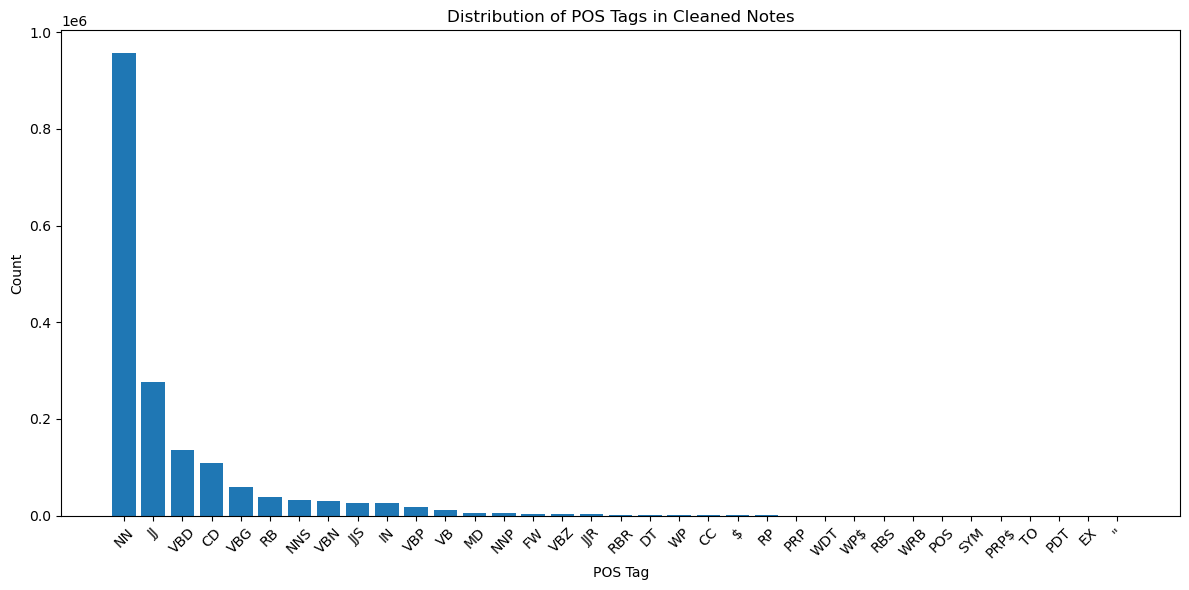

In [24]:
# Flatten the list of POS tags
pos_tags_flat = [tag for tags in acled_df['pos_tags'] for tag in tags]

# Count the occurrences of each POS tag
pos_tag_counts = Counter(pos_tags_flat)

# Convert the counts to a DataFrame for easier plotting
pos_tag_df = pd.DataFrame.from_dict(pos_tag_counts, orient='index').reset_index()
pos_tag_df.columns = ['POS Tag', 'Count']

# Sort the DataFrame by count in descending order
pos_tag_df = pos_tag_df.sort_values(by='Count', ascending=False)

# Plot the distribution of POS tags
plt.figure(figsize=(12, 6))
plt.bar(pos_tag_df['POS Tag'], pos_tag_df['Count'])
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.title('Distribution of POS Tags in Cleaned Notes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()